<a href="https://colab.research.google.com/github/EliseuODaniel/Analise_temperatura_motor_eletrico/blob/main/analise_3_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/notebooks/input/measures_v2.csv')
df.shape

(1330816, 13)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# remoção da coluna torque, pois não servirá como variável nem de entrada e nem de saída
df.drop('torque', axis=1, inplace=True)

#Separação entre Datasets de treino e de teste

In [5]:
#testagens separadas pra teste
test_set_profiles = range(65,73)
x_cols = ['ambient', 'coolant','i_q', 'u_q','i_d', 'u_d', 'motor_speed'] #RMSE = 10.51 (com todas as variáveis)
#x_cols = ['ambient', 'coolant','i_q', 'u_q','i_d', 'u_d'] #RMSE = 12.06 (sem motor_speed)
#x_cols = ['ambient', 'coolant','i_q', 'u_q','i_d',  'motor_speed'] #RMSE =  10.55
#x_cols = ['ambient', 'coolant','i_q', 'u_q', 'u_d', 'motor_speed'] #RMSE = 11.79
#x_cols = ['ambient', 'coolant','i_q', 'i_d', 'u_d', 'motor_speed'] #RMSE = 12.22
#x_cols = ['ambient', 'coolant', 'u_q','i_d', 'u_d', 'motor_speed'] #RMSE = 10.36 (sem i_q - melhor resultado)
#x_cols = ['ambient', 'i_q', 'u_q','i_d', 'u_d', 'motor_speed'] #RMSE = 11.38
#x_cols = [ 'coolant','i_q', 'u_q','i_d', 'u_d', 'motor_speed'] #RMSE = 11.01

#separado 2 datasets, um com as testagens que serão usadas pra treino e outro as de teste
trainset = df.loc[~df.profile_id.isin(test_set_profiles), :].reset_index(drop=True)
testset = df.loc[df.profile_id.isin(test_set_profiles), :].reset_index(drop=True)


X_train = trainset.loc[:, x_cols]
y_train = trainset.loc[:, 'pm']
X_test = testset.loc[:, x_cols]
y_test = testset.loc[:, 'pm']

a variável motor_speed cria resíduos distantes da média, como outliers. Talvez pela unidade da medida de velocidade. E que, ao ser multiplicada ao quadrado, gera valores maiores que os das outras unidades.

In [6]:
X_train.shape

(1148796, 7)

In [7]:
X_test.shape

(182020, 7)

# Modelagem

In [8]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [9]:
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
X_train_poly_features = polynomial_converter.fit_transform(X_train)
X_test_poly_features = polynomial_converter.fit_transform(X_test)

In [10]:
X_train_poly_features.shape

(1148796, 119)

In [11]:
X_test_poly_features.shape

(182020, 119)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train_poly_features,y_train)
test_predictions = model.predict(X_test_poly_features)

# Mensuração dos erros

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [14]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [15]:
MAE

7.561996399702054

In [16]:
MSE

109.00172230088198

In [17]:
RMSE

10.440388991837516

In [18]:
#valor médio das temperaturas do rotor em todo o dataset - para comparar com o RMSE
#ou seja, as previsões do modelo variam 12 para + e - de 58,51
df['pm'].mean()

58.50677585061459

Comparison with multiple linear regression  
MAE = 9.626260043968127  
MSE = 145.61949126832434   
RMSE = 12.067290137736986 

In [19]:
model.coef_

array([-2.64755911e+01,  2.74703249e+00,  5.71157960e-01, -8.97988401e+00,
        4.60274703e+00, -2.94804017e+00,  3.97174421e-01,  4.37835836e-01,
        1.99752609e-02,  2.93831397e-03,  5.32529592e-01, -2.93364717e-01,
       -2.78776101e-02, -1.68536636e-02, -9.72462380e-03, -1.76943457e-03,
       -4.37944425e-02,  9.50385333e-03,  3.64140220e-02,  3.45869609e-04,
        2.51750116e-04, -9.13664388e-03,  5.69105930e-03, -2.81824276e-02,
       -1.39747778e-03, -4.48604145e-02,  2.01021203e-03, -1.47389303e-02,
        2.49951222e-03,  1.34888996e-02,  1.15004960e-02,  1.05818297e-03,
       -8.39616604e-03,  5.22561246e-04, -2.47900216e-05,  9.98828379e-03,
       -4.80013963e-03, -7.71224506e-04, -9.74627576e-03,  5.63379885e-03,
        1.26212227e-03,  1.49560578e-04,  5.37890118e-04,  1.58611816e-04,
        1.81420554e-03, -6.16974516e-04, -2.40301433e-04, -1.41290121e-05,
        8.76586426e-06, -4.53436898e-04, -1.53042482e-04,  1.68179286e-04,
        5.32475312e-05,  

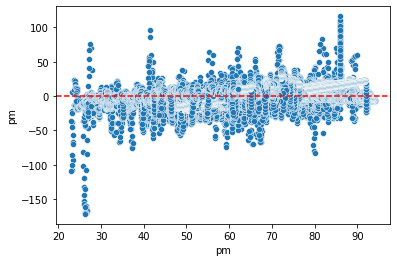

In [20]:
# plotagem da distribuição dos resíduos
test_res = y_test - test_predictions

sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

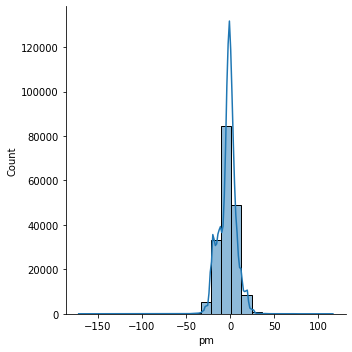

In [21]:
#plotagem da distribuição dos resíduos pra verificar visualmente a normalidade
sns.displot(test_res,bins=25,kde=True)

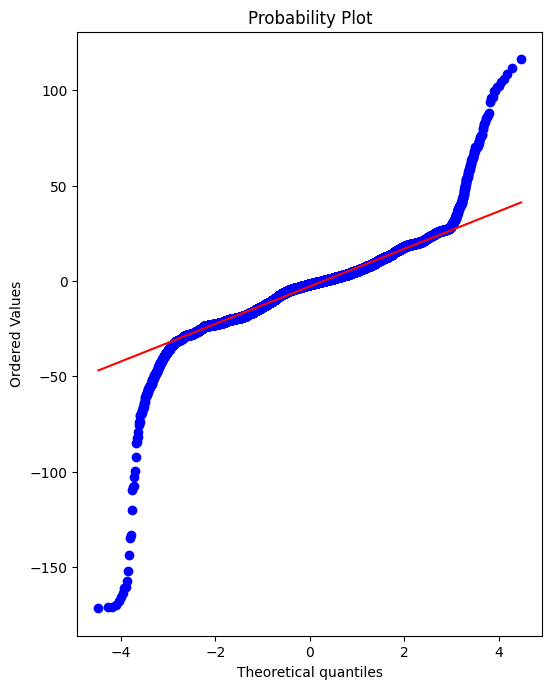

In [22]:
import scipy as sp
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

os resíduos distantes da normal devem-se à variável motor_speed como mencionado mais acima

In [23]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train_poly_features)
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 7.085e+04
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:40:25   Log-Likelihood:            -3.8370e+06
No. Observations:             1148796   AIC:                         7.674e+06
Df Residuals:                 1148677   BIC:                         7.676e+06
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.9820      8.366     33.466      0.000     263.585     296.380
x1           -26.4756      1.122    -23.607      0.000     -28.674     -24.277
x2             2.7470      0.101     27.283      0.000       2.550       2.944
x3             0.5712      0.031     18.409      0.000       0.510       0.632
x4            -8.9799      0.097    -92.156      0.000      -9.171      -8.789
x5             4.6028      0.063     73.146      0.000       4.479       4.726
x6            -2.9480      0.090    -32.804      0.000      -3.124      -2.772
x7             0.3972      0.005     84.809      0.000       0.388       0.406
x8             0.4378      0.051      8.653      0.000       0.339       0.537
x9             0.0200      0.008      2.375      0.018       0.003       0.036
x10            0.0029      0.002      1.183      0.237      -0.002       0.008
x11            0.5325      0.006     89.170      0.000       0.521       0.544
x12           -0.2934      0.004    -68.742      0.000      -0.302      -0.285
x13           -0.0279      0.005     -5.742      0.000      -0.037      -0.018
x14           -0.0169      0.000    -65.309      0.000      -0.017      -0.016
x15           -0.0097      0.000    -23.987      0.000      -0.011      -0.009
x16           -0.0018      0.000     -9.972      0.000      -0.002      -0.001
x17           -0.0438      0.000    -92.663      0.000      -0.045      -0.043
x18            0.0095      0.000     26.923      0.000       0.009       0.010
x19            0.0364      0.000     99.139      0.000       0.036       0.037
x20            0.0003   1.77e-05     19.579      0.000       0.000       0.000
x21            0.0003   6.57e-05      3.830      0.000       0.000       0.000
x22           -0.0091      0.001     -7.508      0.000      -0.012      -0.007
x23            0.0057      0.000     47.105      0.000       0.005       0.006
x24           -0.0282      0.000   -136.804      0.000      -0.029      -0.028
x25           -0.0014   5.89e-05    -23.730      0.000      -0.002      -0.001
x26           -0.0449      0.000   -112.895      0.000      -0.046      -0.044
x27            0.0020      0.001      3.508      0.000       0.001       0.003
x28           -0.0147      0.000    -30.857      0.000      -0.016      -0.014
x29            0.0025   2.33e-05    107.163      0.000       0.002       0.003
x30            0.0135      0.000     64.015      0.000       0.013       0.014
x31            0.0115      0.001     13.111      0.000       0.010       0.013
x32            0.0011   2.38e-05     44.538      0.000       0.001       0.001
x33           -0.0084      0.000    -27.710      0.000      -0.009      -0.008
x34            0.0005   1.48e-05     35.217      0.000       0.000       0.001
x35        -2.479e-05   3.99e-07    -62.208      0.000   -2.56e-05    -2.4e-05
x3

Ajustando os parâmetros

In [24]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,5):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    X_train_poly_features = polynomial_converter.fit_transform(X_train)
    X_test_poly_features = polynomial_converter.fit_transform(X_test)

    # TRAIN ON THIS NEW POLY SET    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_poly_features,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train_poly_features)
    test_pred = model.predict(X_test_poly_features)
    
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [25]:
train_rmse_errors

[11.987580437227521, 9.053098796365713, 6.828594656693907, 5.699459383379581]

In [26]:
test_rmse_errors

[12.067290137732849, 10.51059417664734, 10.440388991837516, 11.435076569279545]

Baseado nos valores, percebe-se que do polinômio de grau 2 para o 3 há relativa estabilização do erro no teste e do 3 para o 4, o erro do teste começa a subir, enquanto o erro do treino continua a decrescer.  
Considerando o aumento de computação necessária do polinômio de grau 2 para o 3 e também o aumento do erro posterior, escolhe-se manter o grau 2. Embora, no teste de OLS de regressão, o R^2 de uma regressão polinomial de grau 3 é de 87%, enquanto de grau 2 é de 78.8%.

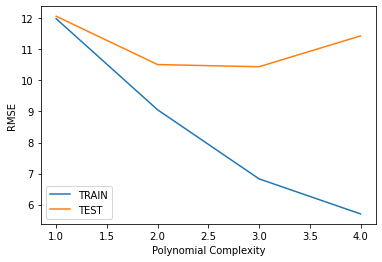

In [27]:
plt.plot(range(1,5),train_rmse_errors,label='TRAIN')
plt.plot(range(1,5),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()